# Prueba de evaluación 2 Entornos de data science con Python 

Parte 1 
En esta primera parte trabajaremos con el API REST de 4chan:  https://github.com/4chan/4chan-API  
 
Se pide lo siguiente: 

• Obtener una muestra de dos boards de 4chan, sacando una instantánea concreta (todas las páginas de cada board). Solo es necesario obtener la información requerida para los puntos siguientes, no es necesario procesar todo. 

• Contrastar diferencias en la media de respuestas por post en los dos boards elegidos. 

• Obtener la distribución del tamaño de las imágenes en los posts de uno de los boards. 

In [77]:
import requests as rq
r = rq.get('https://a.4cdn.org/boards.json')
print r.headers['content-type']
print r.text[:]

application/json
{"boards":[{"board":"3","title":"3DCG","ws_board":1,"per_page":15,"pages":10,"max_filesize":4194304,"max_webm_filesize":3145728,"max_comment_chars":2000,"max_webm_duration":120,"bump_limit":310,"image_limit":150,"cooldowns":{"threads":600,"replies":60,"images":60},"meta_description":"\u0026quot;\/3\/ - 3DCG\u0026quot; is 4chan's board for 3D modeling and imagery.","is_archived":1},{"board":"a","title":"Anime \u0026 Manga","ws_board":1,"per_page":15,"pages":10,"max_filesize":4194304,"max_webm_filesize":3145728,"max_comment_chars":2000,"max_webm_duration":120,"bump_limit":500,"image_limit":250,"cooldowns":{"threads":600,"replies":60,"images":60},"meta_description":"\u0026quot;\/a\/ - Anime \u0026amp; Manga\u0026quot; is 4chan's imageboard dedicated to the discussion of Japanese animation and manga.","spoilers":1,"custom_spoilers":1,"is_archived":1},{"board":"aco","title":"Adult Cartoons","ws_board":0,"per_page":15,"pages":10,"max_filesize":4194304,"max_webm_filesize":314

In [78]:
import json
boards = json.loads(r.text)
#print boards
print(json.dumps(boards, indent=2))

{
  "boards": [
    {
      "max_webm_duration": 120, 
      "meta_description": "&quot;/3/ - 3DCG&quot; is 4chan's board for 3D modeling and imagery.", 
      "cooldowns": {
        "images": 60, 
        "threads": 600, 
        "replies": 60
      }, 
      "title": "3DCG", 
      "is_archived": 1, 
      "max_comment_chars": 2000, 
      "ws_board": 1, 
      "max_filesize": 4194304, 
      "board": "3", 
      "max_webm_filesize": 3145728, 
      "per_page": 15, 
      "bump_limit": 310, 
      "image_limit": 150, 
      "pages": 10
    }, 
    {
      "max_webm_duration": 120, 
      "meta_description": "&quot;/a/ - Anime &amp; Manga&quot; is 4chan's imageboard dedicated to the discussion of Japanese animation and manga.", 
      "cooldowns": {
        "images": 60, 
        "threads": 600, 
        "replies": 60
      }, 
      "title": "Anime & Manga", 
      "spoilers": 1, 
      "is_archived": 1, 
      "max_comment_chars": 2000, 
      "ws_board": 1, 
      "max_filesize": 4

In [79]:
import pandas as pd
import numpy as np

#voy a construir un data frame

boardsDF = pd.DataFrame(columns=["title", "pages", "image_limit", "images", "threads", "replies"])

def add_row(df, board):
    title = board["title"]
    page = int(board["pages"])
    imagelim = int(board["image_limit"])
    images = int(board["cooldowns"]["images"])
    threads = int(board["cooldowns"]["threads"])
    replies = int(board["cooldowns"]["replies"])
    df.loc[board["board"]] = [title,  page,imagelim,images, threads, replies] 
    
for row in boards["boards"]:
    add_row(boardsDF, row)

    
boardsDF  

,title,pages,image_limit,images,threads,replies
3,3DCG,10.0,150.0,60.0,600.0,60.0
a,Anime & Manga,10.0,250.0,60.0,600.0,60.0
aco,Adult Cartoons,10.0,250.0,30.0,600.0,60.0
adv,Advice,10.0,150.0,60.0,600.0,60.0
an,Animals & Nature,10.0,150.0,60.0,600.0,60.0
asp,Alternative Sports & Wrestling,10.0,150.0,60.0,600.0,60.0
b,Random,10.0,150.0,15.0,60.0,15.0
biz,Business & Finance,10.0,150.0,60.0,600.0,60.0
c,Anime/Cute,10.0,150.0,60.0,600.0,60.0
cgl,Cosplay & EGL,10.0,150.0,60.0,600.0,60.0


In [80]:

# Creo una función de descarga de las páginas de un board
def descargaBoard(board, name):
    print '- Título.......:', board['title']
    print '- Nº de páginas:', board['pages']

    # Los datos descargados se van a almacenar en el siguiente data frame
    df_result = pd.DataFrame(columns=['id', 'idPost', 'replies', 'fsize'])

    # Descarga por página
    
    num_pages = board['pages'].astype(np.int32) 

    count_threads = 0
    count_posts = 0
    for p in range(1, num_pages + 1):

        url = 'https://a.4cdn.org/' + name + '/'+ str(p) +'.json'
        print 'Descargando página', p, ':', url, '.'
        url_content = rq.get(url)
        obj_json = json.loads(url_content.text)
        for hilo in obj_json['threads']:
            count_threads = count_threads + 1
            for post in hilo['posts']:
                count_posts = count_posts + 1
                id_post = post['no']
                replies = 0
                fsize = 0
                ext = ''
                if ('replies' in post):
                    replies = int(post['replies'])
                if ('fsize' in post):
                    fsize = float(post['fsize'])
                
                df_result.loc[id_post] = [str(count_threads), id_post, replies, fsize]
                
    return  df_result

In [81]:
# Selecciono dos boards: 
# Photography ("p") 
BoardPhoto = boardsDF.loc['p']
print BoardPhoto
# Descargo las páginas
df_photo = descargaBoard(BoardPhoto, 'p')

title          Photography
pages                   10
image_limit            150
images                  60
threads                600
replies                 60
Name: p, dtype: object
- Título.......: Photography
- Nº de páginas: 10.0
Descargando página 1 : https://a.4cdn.org/p/1.json .
Descargando página 2 : https://a.4cdn.org/p/2.json .
Descargando página 3 : https://a.4cdn.org/p/3.json .
Descargando página 4 : https://a.4cdn.org/p/4.json .
Descargando página 5 : https://a.4cdn.org/p/5.json .
Descargando página 6 : https://a.4cdn.org/p/6.json .
Descargando página 7 : https://a.4cdn.org/p/7.json .
Descargando página 8 : https://a.4cdn.org/p/8.json .
Descargando página 9 : https://a.4cdn.org/p/9.json .
Descargando página 10 : https://a.4cdn.org/p/10.json .


In [82]:
df_photo.head(10)

,id,idPost,replies,fsize
1971605,1,1971605.0,0.0,62554.0
2951884,2,2951884.0,0.0,3768750.0
2949191,3,2949191.0,99.0,1044561.0
2951777,3,2951777.0,0.0,439146.0
2951779,3,2951779.0,0.0,274400.0
2951782,3,2951782.0,0.0,133422.0
2951882,3,2951882.0,0.0,0.0
2951883,3,2951883.0,0.0,1063155.0
2951637,4,2951637.0,11.0,61183.0
2951877,4,2951877.0,0.0,0.0


In [83]:
# y Travel ("trv")
BoardTravel= boardsDF.loc["trv"]
print BoardTravel
# Descargo las páginas
df_travel = descargaBoard(BoardTravel, 'trv')

title          Travel
pages              10
image_limit       150
images             60
threads           600
replies            60
Name: trv, dtype: object
- Título.......: Travel
- Nº de páginas: 10.0
Descargando página 1 : https://a.4cdn.org/trv/1.json .
Descargando página 2 : https://a.4cdn.org/trv/2.json .
Descargando página 3 : https://a.4cdn.org/trv/3.json .
Descargando página 4 : https://a.4cdn.org/trv/4.json .
Descargando página 5 : https://a.4cdn.org/trv/5.json .
Descargando página 6 : https://a.4cdn.org/trv/6.json .
Descargando página 7 : https://a.4cdn.org/trv/7.json .
Descargando página 8 : https://a.4cdn.org/trv/8.json .
Descargando página 9 : https://a.4cdn.org/trv/9.json .
Descargando página 10 : https://a.4cdn.org/trv/10.json .


In [84]:
df_travel.head(10)

,id,idPost,replies,fsize
609350,1,609350.0,5.0,49320.0
609360,1,609360.0,0.0,52786.0
1172985,2,1172985.0,48.0,198789.0
1175033,2,1175033.0,0.0,0.0
1175038,2,1175038.0,0.0,0.0
1175041,2,1175041.0,0.0,0.0
1175043,2,1175043.0,0.0,0.0
1175047,2,1175047.0,0.0,0.0
1171122,3,1171122.0,28.0,74848.0
1174689,3,1174689.0,0.0,0.0


# Contraste de las diferencias en la media de respuestas

Observo que las respuestas para cada hilo se acumulan en el primer post y los siguientes post del mismo hilo llevan 0 respuestas. Para no distorsionar la media la voy a calcular sobre los primeros post de hada hilo. 

In [85]:
#descarto los duplicados del data frame de fotografia
df_photo_replies= df_photo.drop_duplicates(subset=["id"])
df_photo_replies.head(10)

,id,idPost,replies,fsize
1971605,1,1971605.0,0.0,62554.0
2951884,2,2951884.0,0.0,3768750.0
2949191,3,2949191.0,99.0,1044561.0
2951637,4,2951637.0,11.0,61183.0
2951634,5,2951634.0,36.0,396678.0
2951857,6,2951857.0,6.0,1743661.0
2951830,7,2951830.0,7.0,385733.0
2950045,8,2950045.0,179.0,505069.0
2949639,9,2949639.0,119.0,551427.0
2932320,10,2932320.0,198.0,165844.0


In [86]:
# Calculo la media de las respuestas del board de fotografía
MediaRepliesPhoto=df_photo_replies["replies"].mean()
MediaRepliesPhoto

48.16

In [87]:
#descarto los duplicados del data frame de viajes
df_travel_replies= df_travel.drop_duplicates(subset=["id"])
df_travel_replies.head(10)

,id,idPost,replies,fsize
609350,1,609350.0,5.0,49320.0
1172985,2,1172985.0,48.0,198789.0
1171122,3,1171122.0,28.0,74848.0
1174321,4,1174321.0,18.0,187466.0
1174950,5,1174950.0,12.0,353630.0
1166452,6,1166452.0,205.0,4397395.0
1174987,7,1174987.0,3.0,6838.0
1173983,8,1173983.0,21.0,4476925.0
1174652,9,1174652.0,22.0,39461.0
1174747,10,1174747.0,3.0,82829.0


In [88]:
# Calculo la media de las respuestas del board de viajes
MediaRepliesViajes=df_travel_replies["replies"].mean()
MediaRepliesViajes

26.8

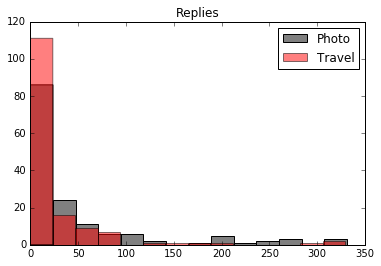

In [99]:
import matplotlib.pyplot as plt

plt.hist(df_photo_replies['replies'], bins=14, histtype='bar', color='grey', label='Photo')
plt.hist(df_travel_replies['replies'], bins=14, histtype='bar', color='red', label='Travel', alpha=0.5)
plt.title('Replies')
plt.legend()
plt.show()



En el gráfico podemos observar que el board de los viajes la media de respuestas es menor.

# Distribución del tamaño de las imágenes.

In [94]:
#Eligo el data frame de los viajes.
#No todos post tienen imagenes
df_travel_file = df_travel[df_travel.fsize != 0]
df_travel_file.head(10)

,id,idPost,replies,fsize
609350,1,609350.0,5.0,49320.0
609360,1,609360.0,0.0,52786.0
1172985,2,1172985.0,48.0,198789.0
1171122,3,1171122.0,28.0,74848.0
1175019,3,1175019.0,0.0,859411.0
1174321,4,1174321.0,18.0,187466.0
1174950,5,1174950.0,12.0,353630.0
1175042,5,1175042.0,0.0,86271.0
1166452,6,1166452.0,205.0,4397395.0
1175020,6,1175020.0,0.0,183034.0


En un histograma veré como se distribuye el tamaño de los ficheros cargados en el board.

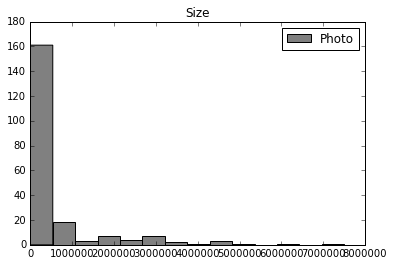

In [98]:
import matplotlib.pyplot as plt

plt.hist(df_travel_file['fsize'], bins=14, histtype='bar', color='grey', label='Photo')
plt.title('Size')
plt.legend()
plt.show()

Observamos una distribución con una larga cola derecha, dados los outlier (ficheros muy grandes).